<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Advanced visualisations in Python

© ExploreAI Academy

In this train, we will use Seaborn and Matplotlib to create a variety of visualisations in Python. We will gain insight into slicing Pandas DataFrames to create advanced visualisations.

## Learning objectives

By the end of this train, you should be able to:
* Navigate a Pandas DataFrame.
* Slice a Pandas DataFrame.
* Produce advanced visualisations in Python.


# Exploring the data

In this notebook, we will learn how to work with Pandas DataFrames and perform some advanced visualisations to draw insights. We'll demonstrate this by working through an example. 

Let's start by importing the libraries we're going to need and loading a dataset about football players and their statistics.

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
soccer = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)
soccer

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,24,16,38,26,12,23,...,19,19,10,32,28,11,50,26,6,GK
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,12,13,13,25,32,12,47,17,12,GK
17978,J. Young,17,Scotland,46,66,26,60,77,41,50,...,42,42,14,51,33,17,32,37,33,ST
17979,J. Lundstram,18,England,46,57,46,58,74,43,45,...,49,43,47,58,49,48,46,51,25,CM


Let's change the following columns to numerical values to make it possible to perform numerical operations on them.

In [10]:
cols = ['Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer[cols] = soccer[cols].apply(pd.to_numeric, errors='coerce', axis=1)

The following code block shows the first 10 rows of the DataFrame.

In [5]:
soccer.head(10)

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK
5,R. Lewandowski,28,Poland,91.0,79.0,80.0,78.0,80.0,89.0,87.0,...,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST
6,De Gea,26,Spain,90.0,57.0,38.0,60.0,43.0,42.0,64.0,...,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK
7,E. Hazard,26,Belgium,90.0,93.0,54.0,93.0,91.0,92.0,87.0,...,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW
8,T. Kroos,27,Germany,90.0,60.0,60.0,71.0,69.0,89.0,85.0,...,90.0,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM
9,G. Higuaín,29,Argentina,90.0,78.0,50.0,75.0,69.0,85.0,86.0,...,75.0,88.0,18.0,80.0,72.0,22.0,85.0,70.0,88.0,ST


Let's have a look at the descriptive statistics of each column to see if we can spot any anomalies.

In [13]:
soccer.describe()

,Age,Overall
count,17981.000000,17981.000000
mean,25.144541,66.247984
std,4.614272,6.987965
min,16.000000,46.000000
25%,21.000000,62.000000
50%,25.000000,66.000000
75%,28.000000,71.000000
max,47.000000,94.000000


It would appear that we have `17981` entries in total, with some `NaN` values and some values that fall outside of the expected stats range.

We would have difficulty comparing an acceleration score of 67 with an anomaly score of 33270, where we expected all scores to fall below 100.

Let's convert all statistics > 100 to `NaN` and see the summary statistics again.

In [14]:
for column in soccer.describe().columns:
    soccer[column] = soccer[column].apply(lambda x: x if x<=100 else np.nan)
    
soccer.describe()

,Age,Overall
count,17981.000000,17981.000000
mean,25.144541,66.247984
std,4.614272,6.987965
min,16.000000,46.000000
25%,21.000000,62.000000
50%,25.000000,66.000000
75%,28.000000,71.000000
max,47.000000,94.000000


Now we have a much better dataset with all the anomalies removed, so we can easily compare the values that are available to us.

## Slicing

Slicing is important for extracting a subset of a DataFrame. Using ``.iloc[]``, we will be able to slice the DataFrame similarly to the way we would slice a list. It uses number slicing to get **positional** records. The syntax for slicing is as follows:

```
dataframe.iloc[start_row:stop_row , start_column:stop_column]
``` 

When slicing in Pandas the start bound is included in the output, i.e. if we slice rows `[0:5]`, we will extract rows 0 to 4. 

Another slicing method is to use the ```.loc[]``` function native to Pandas. `.loc[]` allows us to slice based on data _labels_, as opposed to `.iloc[]` which slices based on the DataFrame _index_. An easy way to remember the difference is the **i** in `.iloc[]` is for **i**ndex.

In [15]:
soccer.iloc[1:101,:] # selects rows 1 to 100 from the DataFrame

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK
5,R. Lewandowski,28,Poland,91,79,80,78,80,89,87,...,83,88,19,83,79,42,84,78,87,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D. Alli,21,England,84,77,84,74,62,85,86,...,83,77,57,76,89,63,71,83,76,LM CF CAM
97,S. Mané,25,Senegal,84,94,73,89,85,84,78,...,77,77,38,92,82,35,72,78,68,LW RW
98,Carvajal,25,Spain,84,76,81,82,79,83,74,...,81,64,86,86,84,85,75,57,34,RB
99,J. Draxler,23,Germany,84,76,48,81,75,87,81,...,84,86,26,79,68,35,67,84,84,LM CAM LW


## Renaming columns

In Python, it is good practice to label columns in a way that conforms to PEP 8 naming standards (for example, no spaces in the name). 

Below we illustrate how to change the name of a column in a Pandas DataFrame.

In [ ]:
soccer = soccer.rename(columns = {"Preferred Positions": "Preferred_Positions"})
soccer.head()

## Working with data types

Thinking back to previous lessons, we will remember that Python has different data types, each with their own characteristics and rules. We may remember that categorical data can have _grouping_ or _order_ and do not need to be (but can be) numerical. Examples would be:
* Sex 
* Country of origin


To find non-numerical categorical data in our DataFrame, we first use ```.select_dtypes(include/exclude)``` to find the data type. 

In Python, non-numerical data are usually stored as an ```object```. Let's identify the non-numeric data columns in the ```soccer``` DataFrame.

In [ ]:
soccer.select_dtypes(include=['object']).head()

In some cases, it might benefit our analysis to change the data types in our DataFrame (such as converting an `integer` to a `float`). The code below enables us to do this. 

Let's take ```Age```, generally expressed as an `int`, and convert it to a `float` using the ```.astype()``` function.

In [17]:
soccer['Age'] = soccer['Age'].astype('float')
soccer['Age'].dtype

dtype('float64')

# Visualising the data

Pandas DataFrames are a great way to wrangle data, but to see trends and patterns, find key insights, and identify outliers in the data, it generally helps to visualise them in a meaningful way. Python has some of the best graphing packages available to facilitate this. ```Matplotlib``` and ```Seaborn``` are two of the most commonly used packages for a variety of visualisations. 

Let's demonstrate some useful visualisations.

In [20]:
# set our colour palette preference for seaborn
sns.set_palette("Spectral_r",n_colors=4)

## Histogram

A histogram is very similar to a bar chart, except that it **groups** data or puts it into **ranges**. These groupings/ranges are called "**bins**".

```Seaborn``` and ```Matplotlib``` have their own histogram functions. 

```Seaborn``` will combine the histogram with a distribution if prompted to do so.
If we want to display the distribution, we simply add the argument ```kde=True``` to the plot.

Let's look at how to graph a histogram in both `Matplotlib` and `Seaborn` below.

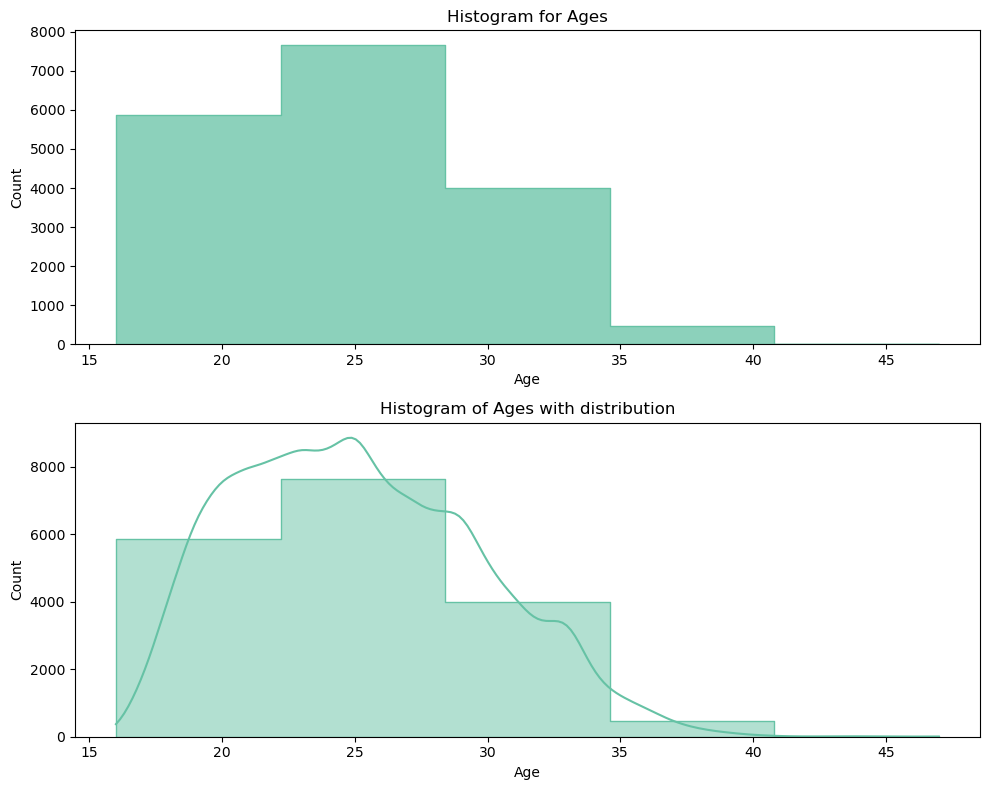

In [19]:
#seaborn
fig, ax = plt.subplots(2,1, figsize=(10,8)) 

sns.histplot(soccer['Age'], bins=5, element="step", ax=ax[0]) 
sns.histplot(soccer['Age'], bins=5, element="step", kde=True, ax=ax[1]) 

ax[0].set_title('Histogram for Ages')
ax[1].set_title('Histogram of Ages with distribution')

plt.tight_layout()
plt.show()

In [ ]:
#matplotlib
plt.xlabel('Age')
plt.hist(soccer['Age'], bins=5)
plt.show()

Note how ```Seaborn``` automatically labels the axes for us whereas ```Matplotlib``` does not and the axes need to be specified.

## Jointplots

```Seaborn```'s _jointplot_ will graphically display two variables on one plot and a single variable on the marginal sides of the graph. Essentially, a _jointplot_ allows us to see the relationship between two variables as well as each variable independently. 

Let's see an example below: 

In [ ]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='reg')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

In the graph above, it is still difficult to see how the `Overall` and `Age` variables are related. To improve this, we can try changing the type of plot or _kind_ to a hexagon, which displays the number of matching points much more clearly. 

Looking at the code below, we added the argument ```kind='hex'```.

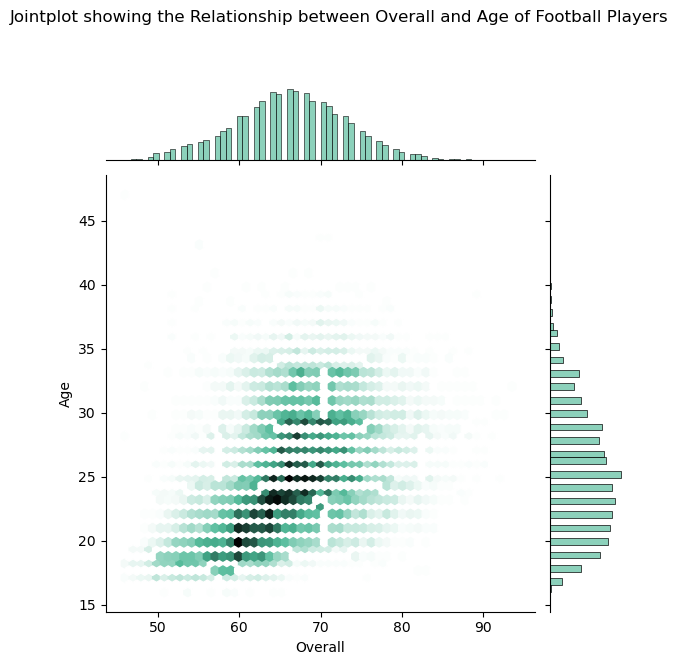

In [21]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='hex')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

## Box plots

Box plots are used to show the spread of data. The main difference between a box plot and a histogram (which also shows a distribution as mentioned above) is that it takes up less space to plot. 

Box plots are constructed using the 5-number summary as indicated below:

```{Lower Extreme ; Q1 ; Median ; Q3 ; Upper Extreme}```

![](https://upload.wikimedia.org/wikipedia/commons/5/5c/Labeled_Box_and_Whisker_Plot.png)

Let's see how the `Overall` stats compare based on different ages (from 23 to 26 years old):


In [23]:
young_players = soccer[(soccer['Age'] > 22) & (soccer['Age'] < 27)] #filter ages

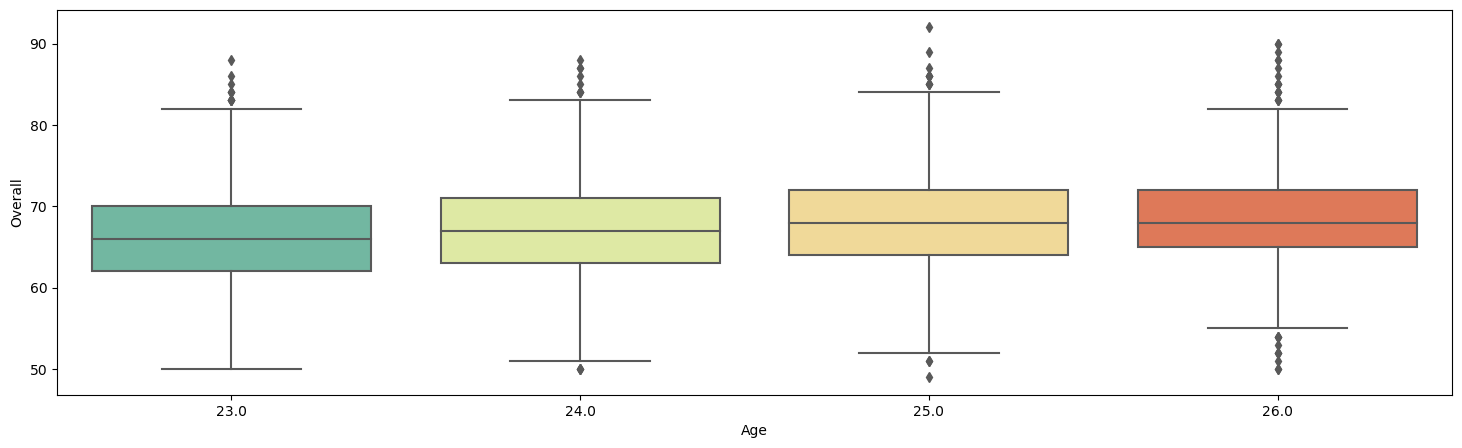

In [24]:
plt.figure(figsize=(18,5))

sns.boxplot(data=young_players, x='Age', y='Overall')
plt.show()

From the plot above, we can see the general trends of `Overall` stats for each specific age. Box plots, compared to histograms, can make it much easier to compare groupings of data.

## Violin plot

Violin plots are similar to box plots, but they use the KDE or distribution of values for groupings, in addition to a box (the box is still present within each graph). 

Let's plot one using ```Seaborn``` with the `Overall` stats for various `Age` categories (from 23 to 26 years old).

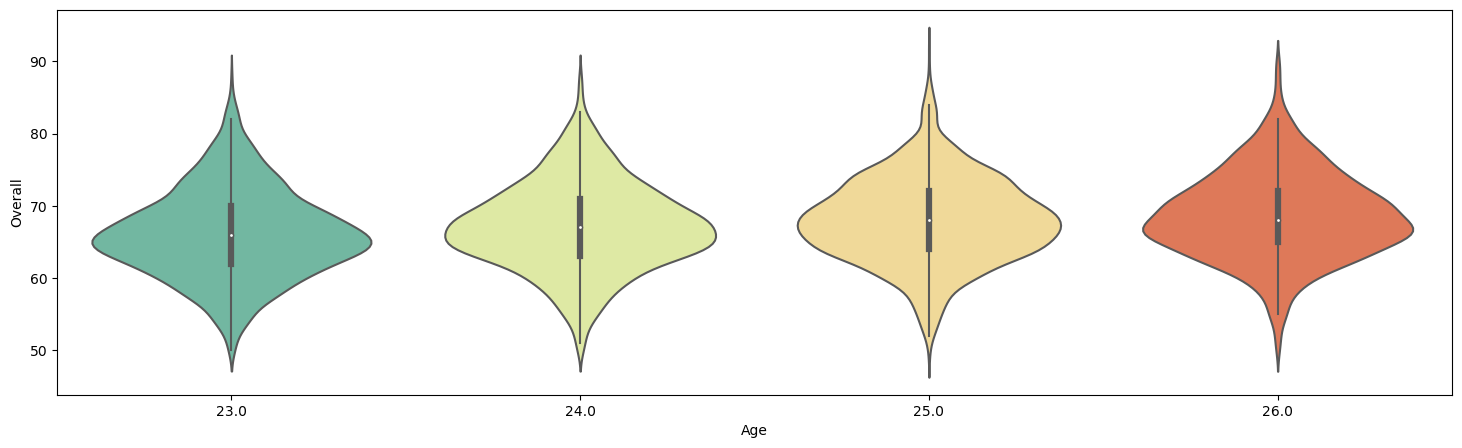

In [25]:
plt.figure(figsize=(18,5))

sns.violinplot(data=young_players, x='Age', y='Overall')
plt.show()

The violin plots show us the general distribution across each age, and it makes it much easier for us to compare them.

## Facet grid

Sometimes a useful approach (specifically when exploring medium-dimensional data) is to draw the same plot (a facet) on multiple subsets of the dataset, resulting in a matrix of visualisations (a facet grid). This technique is commonly referred to as “lattice”, or “trellis” plotting, and it is related to the idea of _small multiples_. 

Our data will need to be in a Pandas DataFrame for this to work.

Let's try this on our dataset.

In [27]:
goalkeepers = soccer[(soccer['Preferred_Positions'].str.contains('GK'))]

KeyError: 'Preferred_Positions'

In [ ]:
sns.pairplot(goalkeepers[['Age','GK diving','GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']],
             hue='Age',palette="Spectral_r")
plt.show()

To practice further, we will work with one of the practice datasets in ```Seaborn```.

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
g = sns.FacetGrid(tips, col="day")
g.map(plt.hist, "total_bill");
plt.show()

Let's plot another example.

In [ ]:
g = sns.FacetGrid(tips, col="day", row="sex")
g.map(plt.hist, "total_bill");
plt.show()

# Summary

Data visualisation is the act of taking information (data) and placing it into a visual context – such as a map or graph – to make sense of it. Data visualisations make it simpler for the human brain to understand data, making it easier to detect patterns, trends, and outliers.

In this train, we learned how to navigate a Pandas DataFrame, how to slice a Pandas DataFrame, and how to produce advanced visualisations in Python.

After completing this train, we should have a very good idea of how to effectively visualise  data with ```Seaborn``` and ```Matplotlib```. However, this train is by no means exhaustive, so it is encouraged to experiment and explore the many other plots available.


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>